In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_excel('finish_table.xlsx')
df = df[df.columns.drop(list(df.filter(regex='^Unnamed')))]
df

,number_ip_id,number_ip_date,year,birthday,hometown,dep_id,uniq_details,credit_type,sum_rub,ip_sum,status_id
0,129954/19/16007-ИП,23.12.2019,2019,1985-07-31,ГОР. КАЗАНЬ,45,Постановление судебного,NaN,NaN,NaN,4
1,9013/20/16007-ИП,03.02.2020,2020,1993-05-19,Г. КАЗАНЬ,45,Постановление судебного,NaN,NaN,NaN,4
2,60056/17/16007-ИП,03.10.2016,2016,1990-09-01,Г. КАЗАНЬ,45,Судебный приказ,Задолженность,NaN,NaN,4
3,27869/18/16007-ИП,04.05.2018,2018,1990-09-01,Г. КАЗАНЬ,45,Исполнительный лист,Задолженность по кредитным платежам (кроме ипо...,NaN,NaN,4
4,65669/19/16007-ИП,05.08.2019,2019,1990-09-01,Г. КАЗАНЬ,45,Исполнительный лист,Задолженность по кредитным платежам (кроме ипо...,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...
26528,128192/18/16018-ИП,18.12.2018,2018,1992-01-24,"РЕСП. ТАТАРСТАН, Г. АРСК",34,Судебный приказ,Задолженность по кредитным платежам (кроме ипо...,NaN,NaN,2
26529,13754/14/16012-ИП,21.11.2014,2014,1983-09-28,"РОССИЯ, РЕСП. ТАТАРСТАН (ТАТАРСТАН), АКСУБАЕВ...",37,Постановление судебного,NaN,NaN,NaN,2
26530,1333/18/16012-ИП,01.02.2018,2018,1985-01-12,"САМАРСКАЯ ОБЛ., С. БОЛЬШАЯ ЧЕРНИГОВКА",37,Исполнительный лист,"Госпошлина, присужденная судом",NaN,NaN,2
26531,135288/19/16006-ИП,26.09.2018,2018,1968-03-30,ГОР. КАЗАНЬ,36,Судебный приказ,Задолженность по платежам за услуги связи,NaN,NaN,3


In [14]:
df['counter'] = 1

Топ отделений ФССП в Татарстане по кол-ву задолженностей


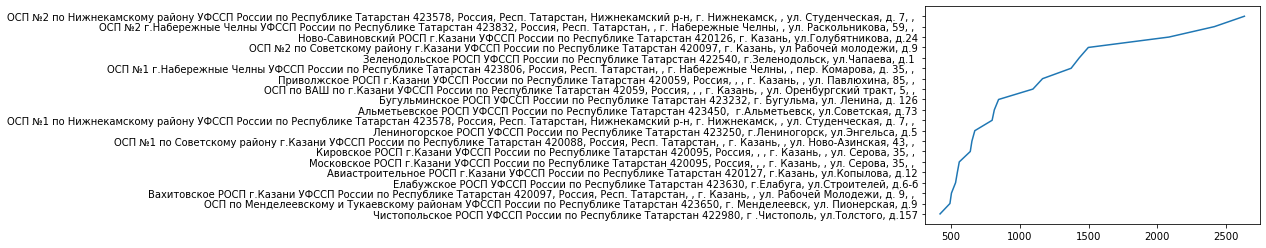

In [15]:
dim_deps = pd.read_excel('dim_department.xlsx')
new_df = df.groupby(['dep_id'])['counter'].sum()
new_df = new_df.reset_index(level=['dep_id'])
new_df = pd.merge(new_df, dim_deps, how='inner', on = 'dep_id')
new_df['dep_id'] = new_df['dep_id'].astype(str)
new_df = new_df.sort_values(by=['counter'])
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(new_df.counter[-20:],  new_df.department[-20:]);  # Plot some data on the axes.
print("Топ отделений ФССП в Татарстане по кол-ву задолженностей")
new_df.to_excel('Топ отделений ФССП в Татарстане по кол-ву задолженностей.xlsx')

Кол-во оформленных и неоплаченных задолженностей по годам оформления


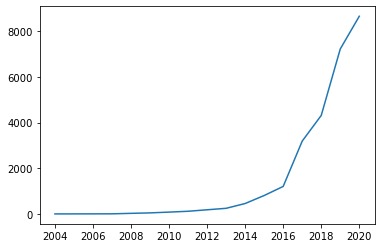

In [16]:
new_df = df.groupby(['year'])['counter'].sum()
new_df = new_df.reset_index(level=['year'])
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(new_df.year,  new_df.counter);  # Plot some data on the axes.
print('Кол-во оформленных и неоплаченных задолженностей по годам оформления')
new_df.to_excel('Кол-во оформленных и неоплаченных задолженностей по годам оформления.xlsx')

Основная масса людей с задолженностями по дате рождения


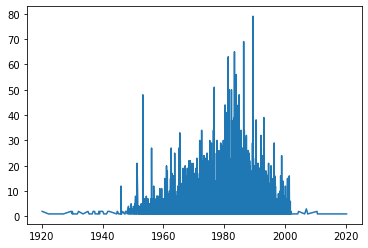

In [17]:
new_df = df.groupby(['birthday'])['counter'].sum()
new_df = new_df.reset_index(level=['birthday'])
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(new_df.birthday,  new_df.counter);  # Plot some data on the axes.
print('Основная масса людей с задолженностями по дате рождения')
new_df.to_excel('Основная масса людей с задолженностями по дате рождения.xlsx')

In [18]:
df['birthday_year'] = df['birthday'].astype(str).str[:4] 

Топ задолженностей по году рождения


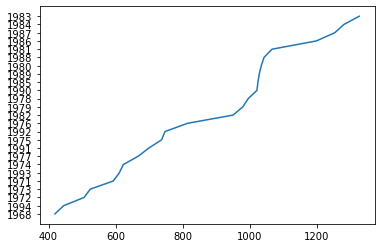

In [19]:
new_df = df.groupby(['birthday_year'])['counter'].sum()
new_df = new_df.reset_index(level=['birthday_year'])
new_df = new_df.sort_values(by=['counter'])
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(new_df.counter[-25:],  new_df.birthday_year[-25:]);  # Plot some data on the axes.
print('Топ задолженностей по году рождения')
new_df.to_excel('Топ задолженностей по году рождения.xlsx')

Топ задолженностей по информации в деталях


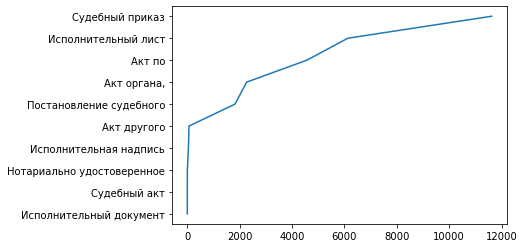

In [20]:
new_df = df.groupby(['uniq_details'])['counter'].sum()
new_df = new_df.reset_index(level=['uniq_details'])
new_df = new_df.sort_values(by=['counter'])
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(new_df.counter,  new_df.uniq_details);  # Plot some data on the axes.
print('Топ задолженностей по информации в деталях')
new_df.to_excel('Топ задолженностей по информации в деталях.xlsx')

Топ задолженностей по типу задолженности


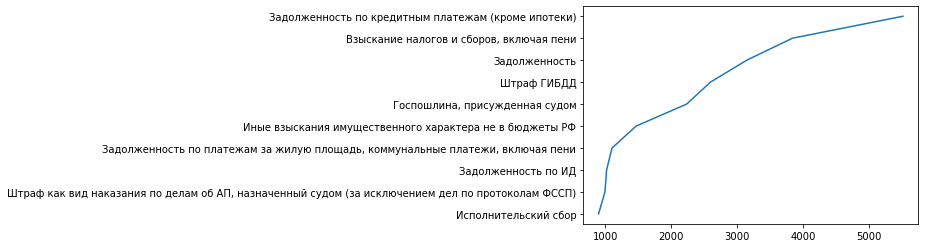

In [21]:
new_df = df.groupby(['credit_type'])['counter'].sum()
new_df = new_df.reset_index(level=['credit_type'])
new_df= new_df.sort_values(by=['counter'])
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(new_df.counter[-10:],  new_df.credit_type[-10:]);  # Plot some data on the axes.
print('Топ задолженностей по типу задолженности')
new_df.to_excel('Топ задолженностей по типу задолженности.xlsx')